In [1]:
#import numpy and pandas for data manipulation
import numpy as np
import pandas as pd
#Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size']=18
matplotlib.rcParams['figure.dpi']=200
from IPython.core.pylabtools import figsize

In [2]:
#read in data
flights=pd.read_csv("https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/flights.csv")
carriers=pd.read_csv("https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/by_carrier.csv")
airlines=pd.read_csv("https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/airlines.csv")
flights=flights.merge(airlines, how='left', on='carrier')
flights=flights[['arr_delay','name']]
#Filter flight delay between -60 to 120 minute
flights=flights[flights['arr_delay'].between(-60,120)]
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [3]:
pwd

'/home/aloisstar'

In [4]:
flights.to_csv("/home/aloisstar/formatted_flights")

In [5]:
flights=pd.read_csv("/home/aloisstar/formatted_flights")
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

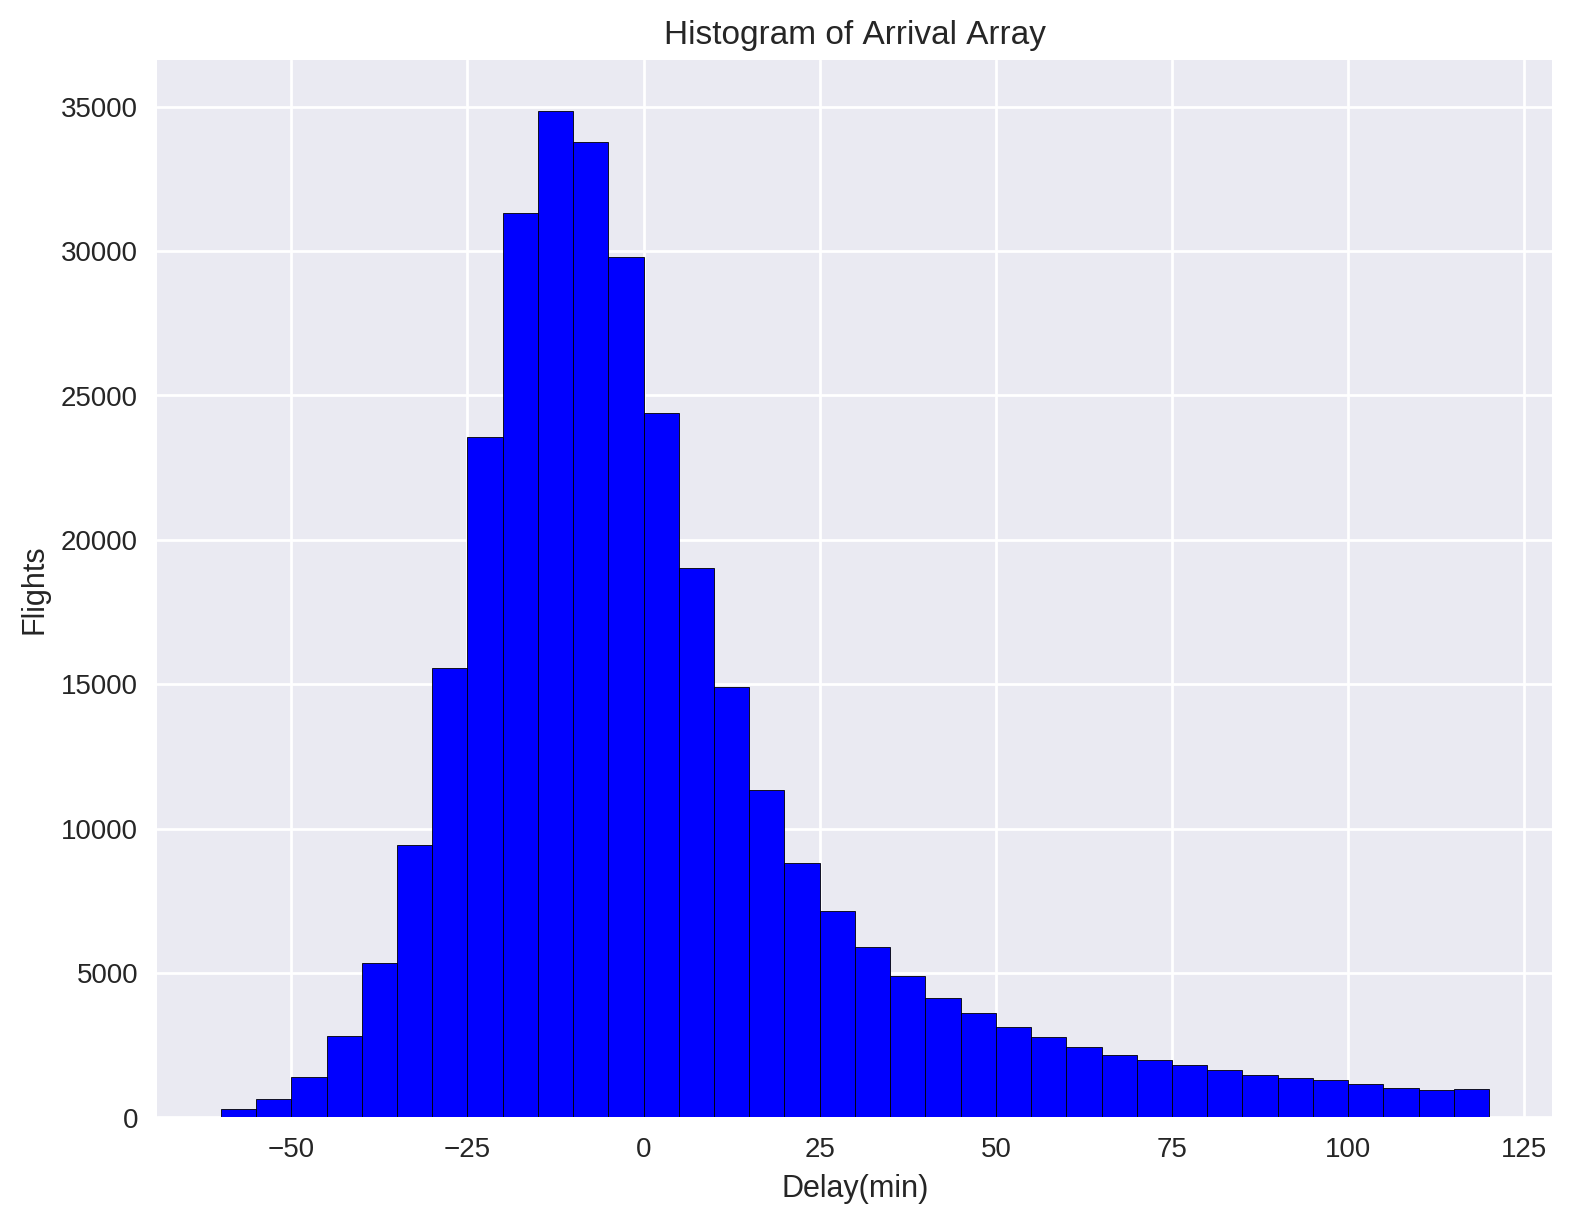

In [6]:
figsize(9,7)
# Make histogram using matplot ,bin must be an integer
plt.hist(flights['arr_delay'],color='blue',edgecolor='black',
        bins=int(180/5))
#Add labels
plt.title("Histogram of Arrival Array")
plt.xlabel("Delay(min)"); plt.ylabel('Flights');


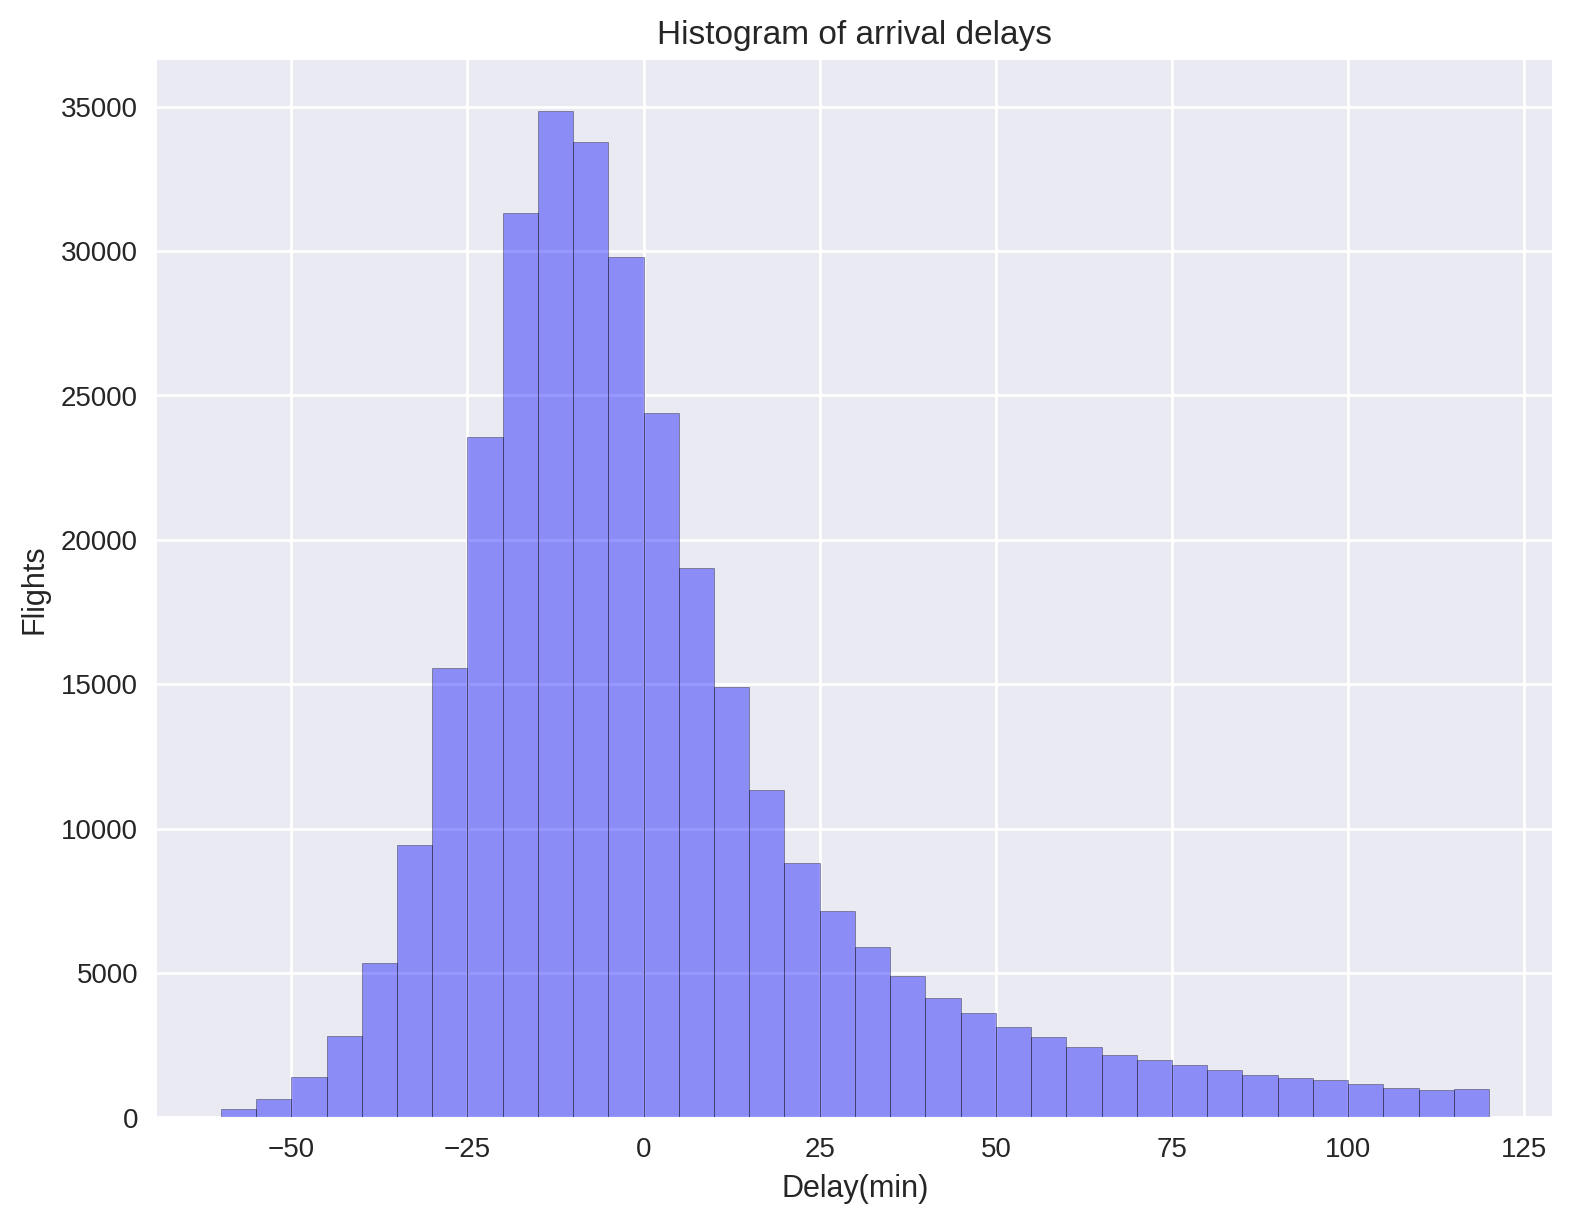

In [7]:
#Seaborn
figsize(9,7)
sns.distplot(flights['arr_delay'], hist=True, kde=False,
            bins = int(180/5), color ='blue',
            hist_kws={'edgecolor':'black'})
plt.title('Histogram of arrival delays')
plt.xlabel('Delay(min)'); plt.ylabel('Flights');

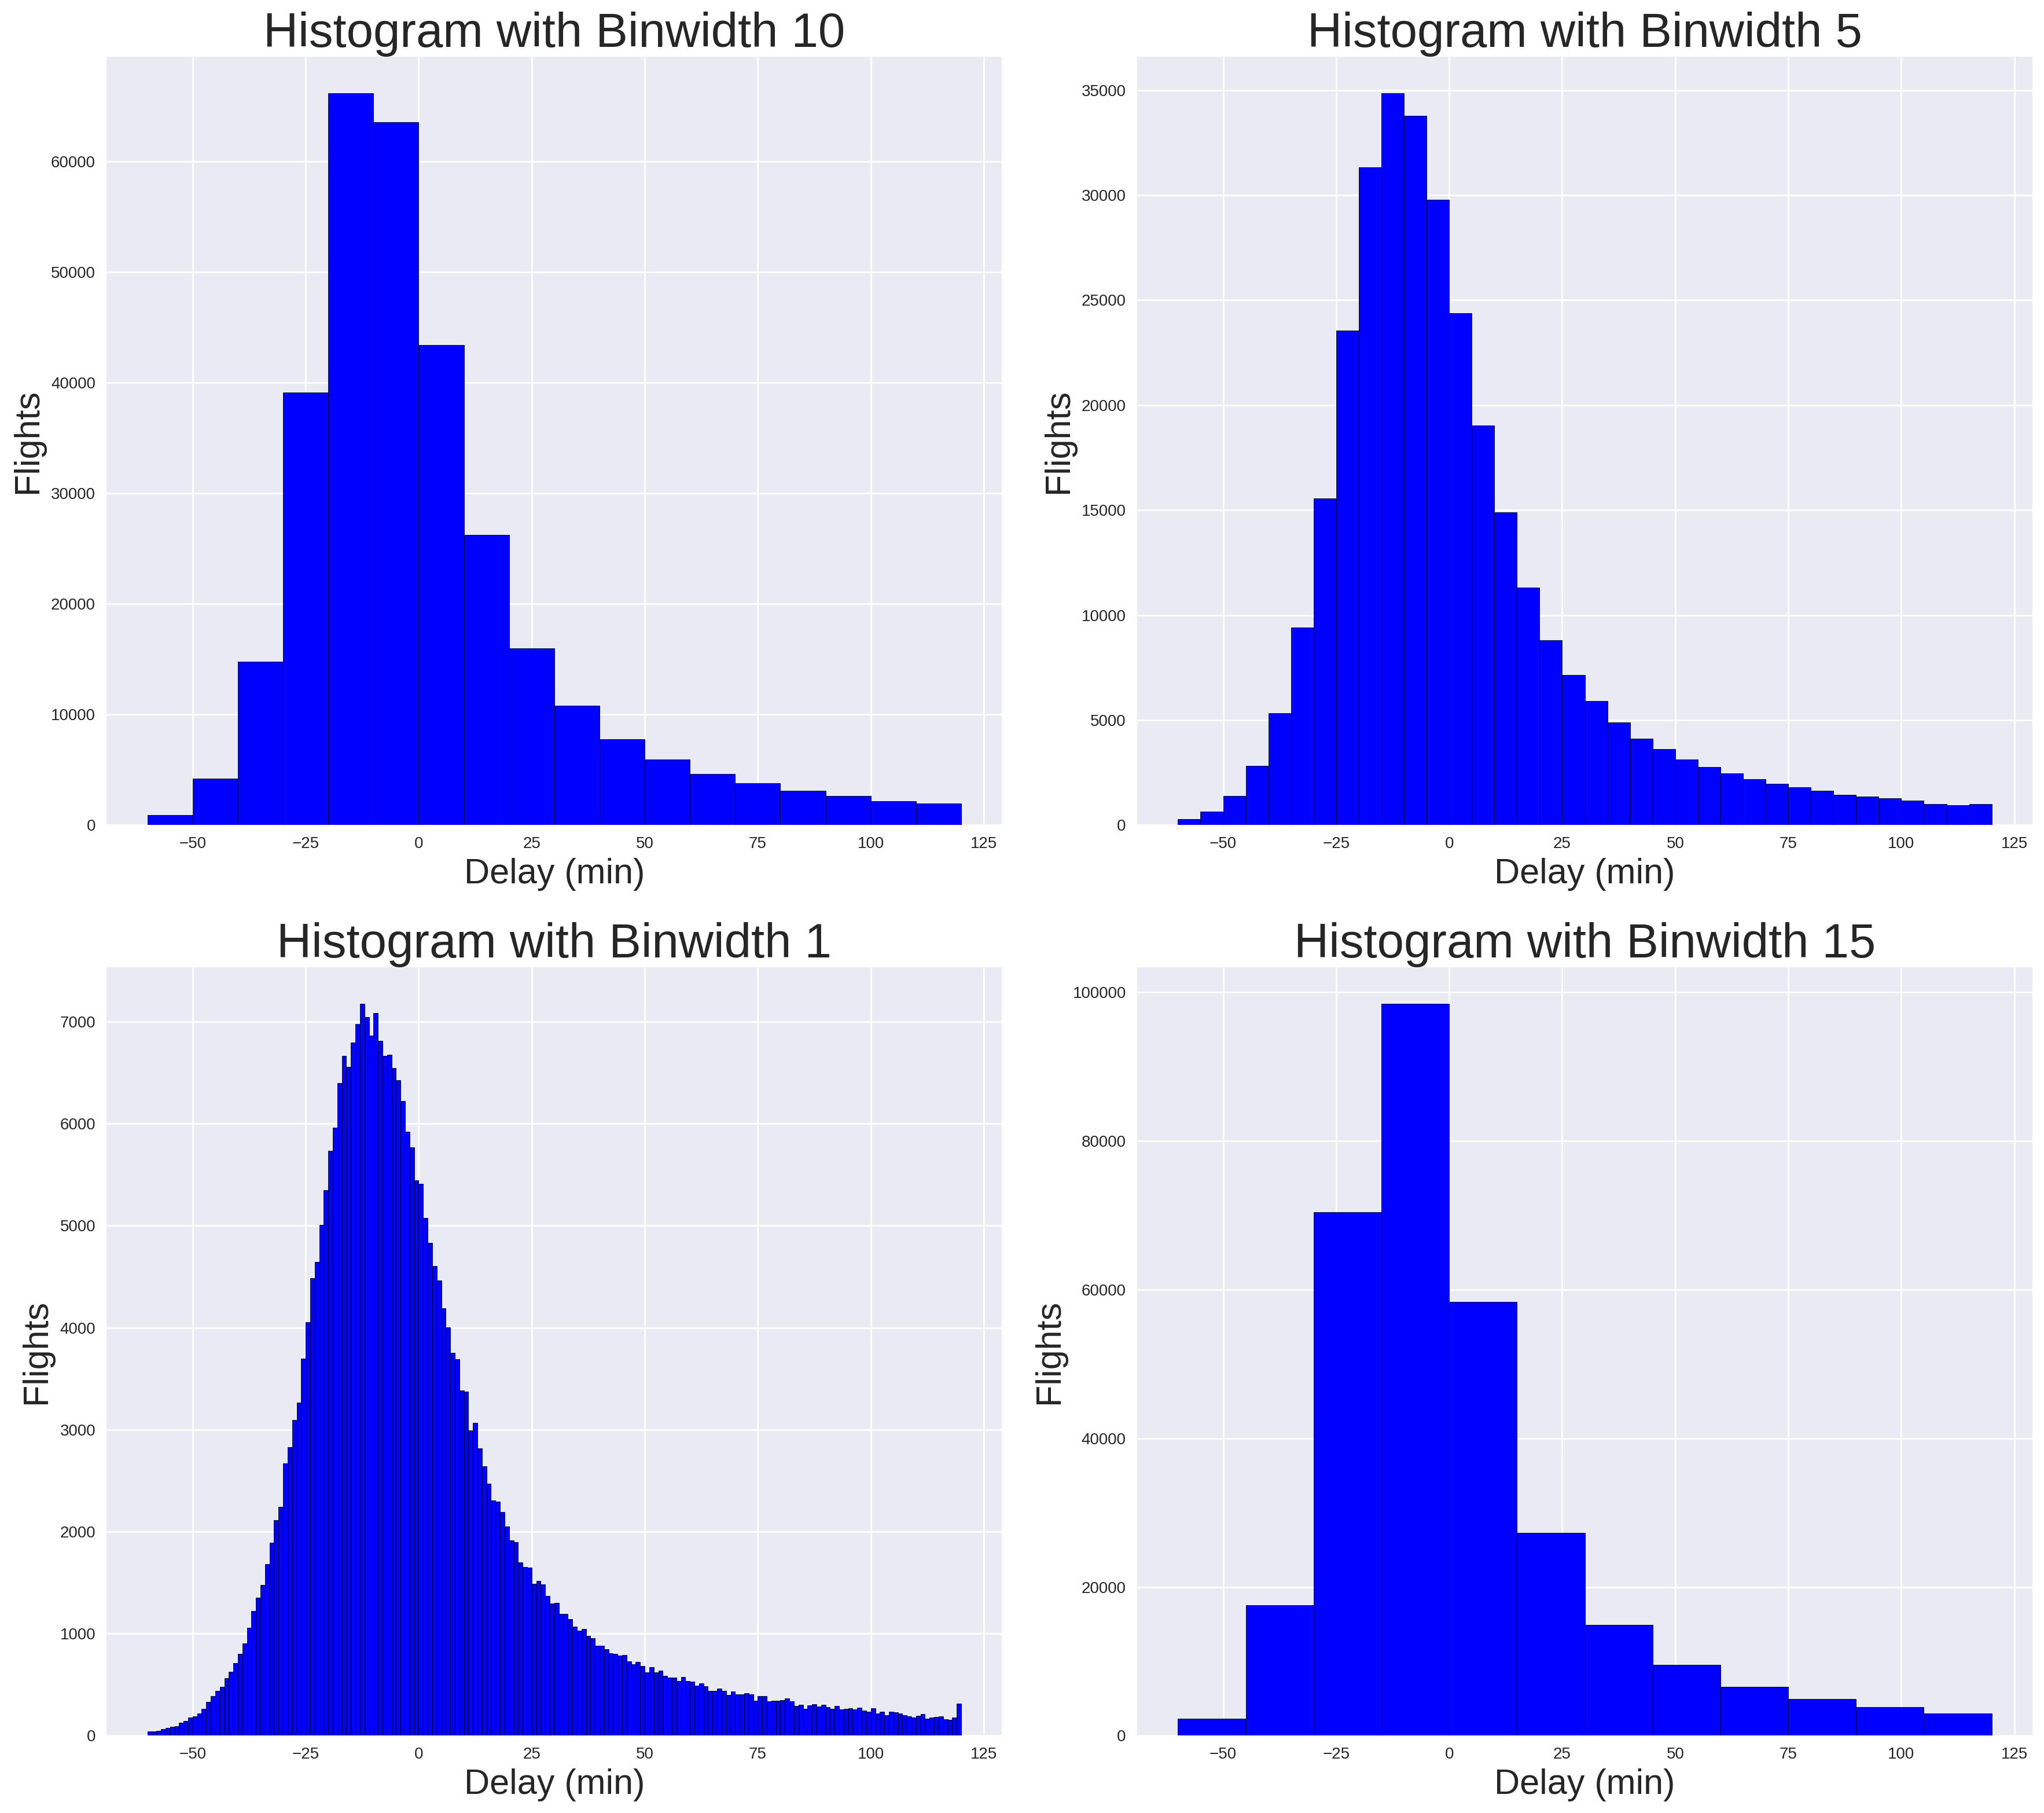

In [8]:
#Histogram with varying binwidth
figsize(18,16)
# show 4 different bindwidth
for i,binwidth in enumerate([10,5,1,15]):
    #set up a plot
    ax=plt.subplot(2,2,i+1)
    #Draw the plot
    ax.hist(flights['arr_delay'],bins=int(180/binwidth),
         color='blue',edgecolor='black')
    #Titles and Labels
    ax.set_title('Histogram with Binwidth %d' %binwidth,size=30)
    ax.set_xlabel('Delay (min)',size=22)
    ax.set_ylabel('Flights',size=22)
plt.tight_layout()
plt.show()

In [9]:
#Extract top 5 airline with most flights
carrier_flights=pd.Series(flights.groupby('name')['name'].count())
carrier_flights=carrier_flights.sort_values(ascending=False)
top_five=carrier_flights.index[:5]
#subset to the top 5 airline
top_five_flights=flights[flights['name'].isin(top_five)]

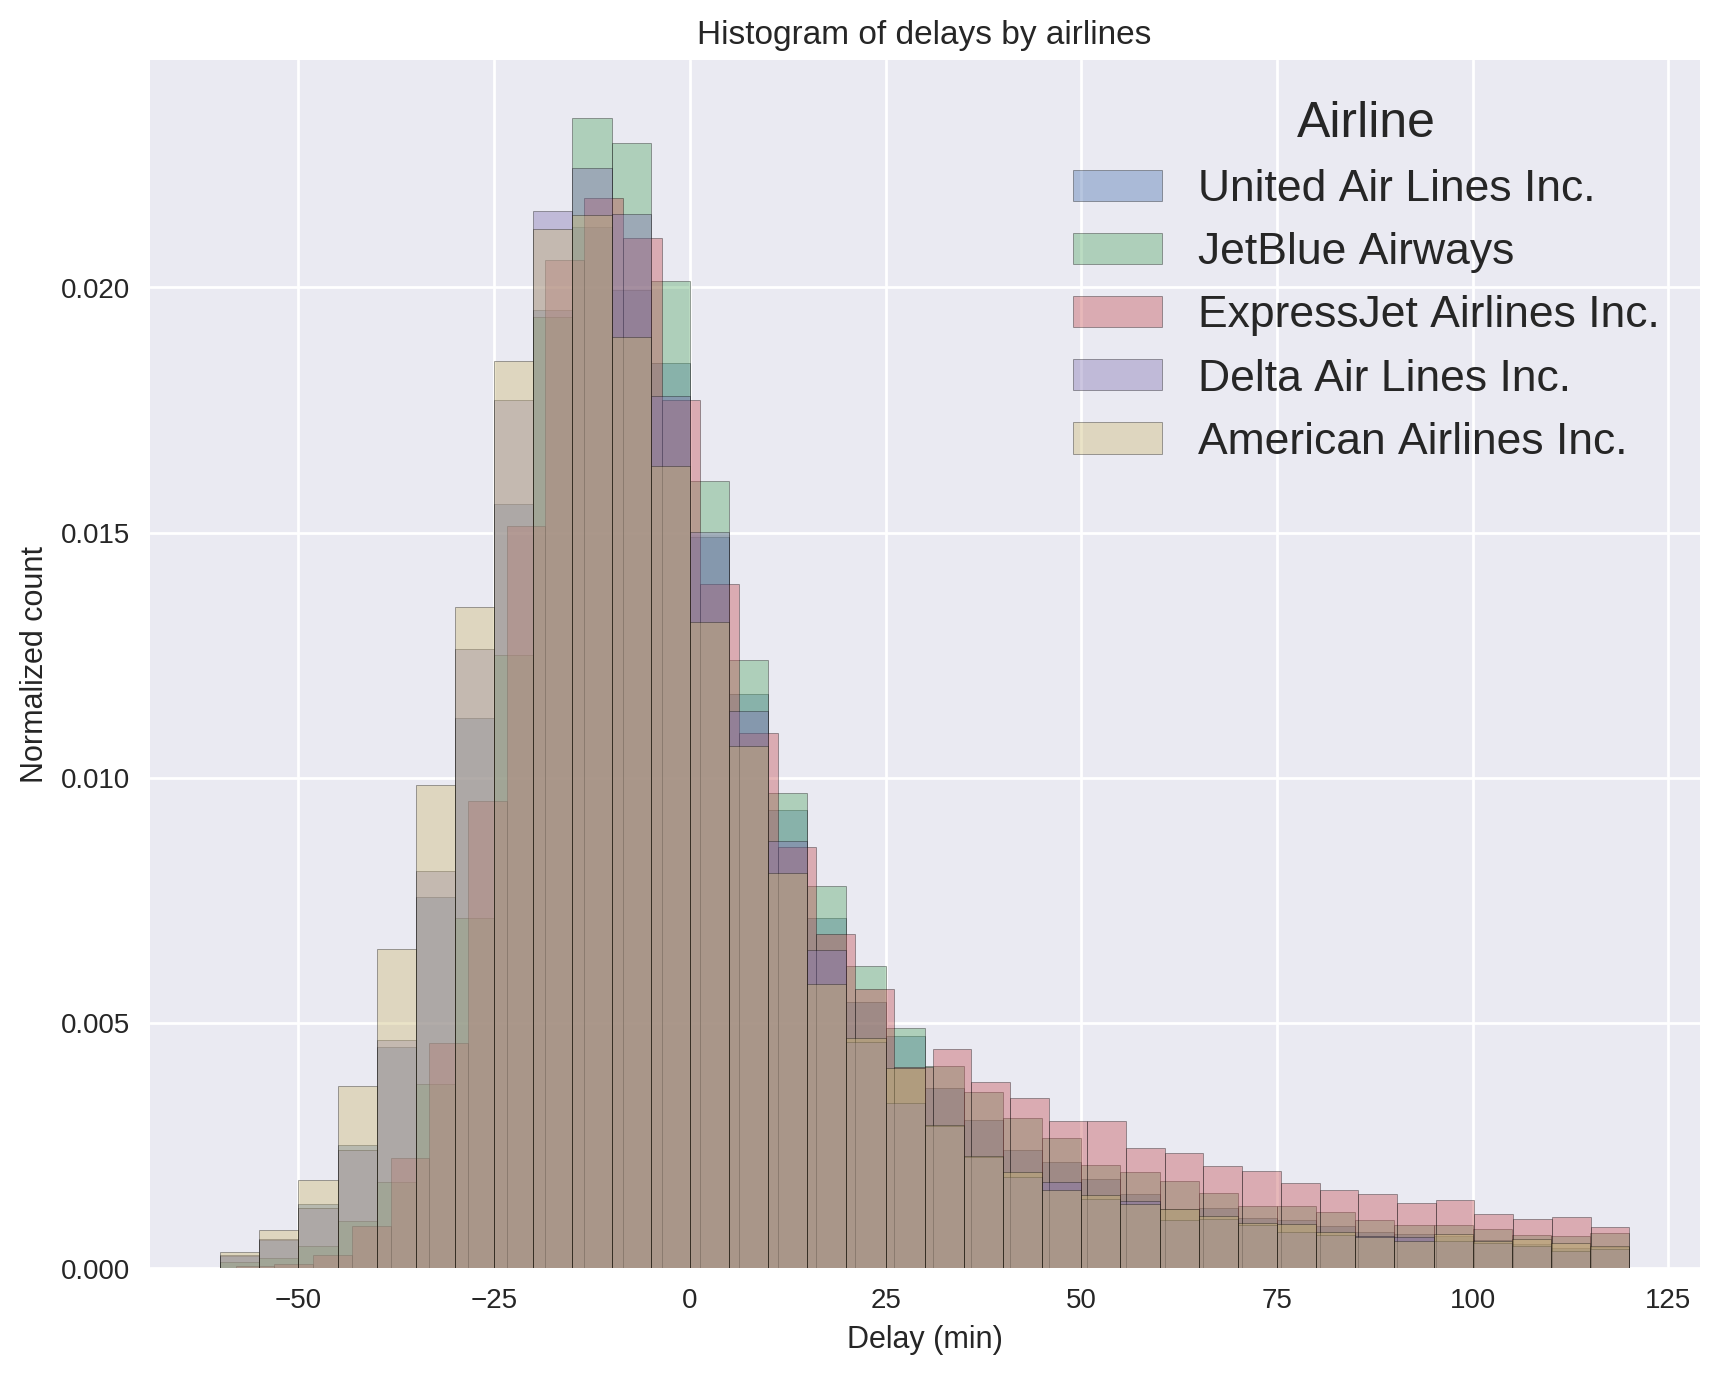

In [10]:
figsize(10, 8)
# iterate through each of five airlines
for airline in top_five:
    #subset to the airline 
    subset=top_five_flights[top_five_flights['name']==airline]
    # make a histogram with a airlines
    sns.distplot(subset['arr_delay'], bins=int(180/5),
                 label=airline, hist=True, kde=False,
                 norm_hist=True,
                 hist_kws={'edgecolor':'black'})
plt.legend(prop={'size': 16}, title='Airline')
plt.title('Histogram of delays by airlines')
plt.ylabel('Normalized count');plt.xlabel("Delay (min)")

In [11]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

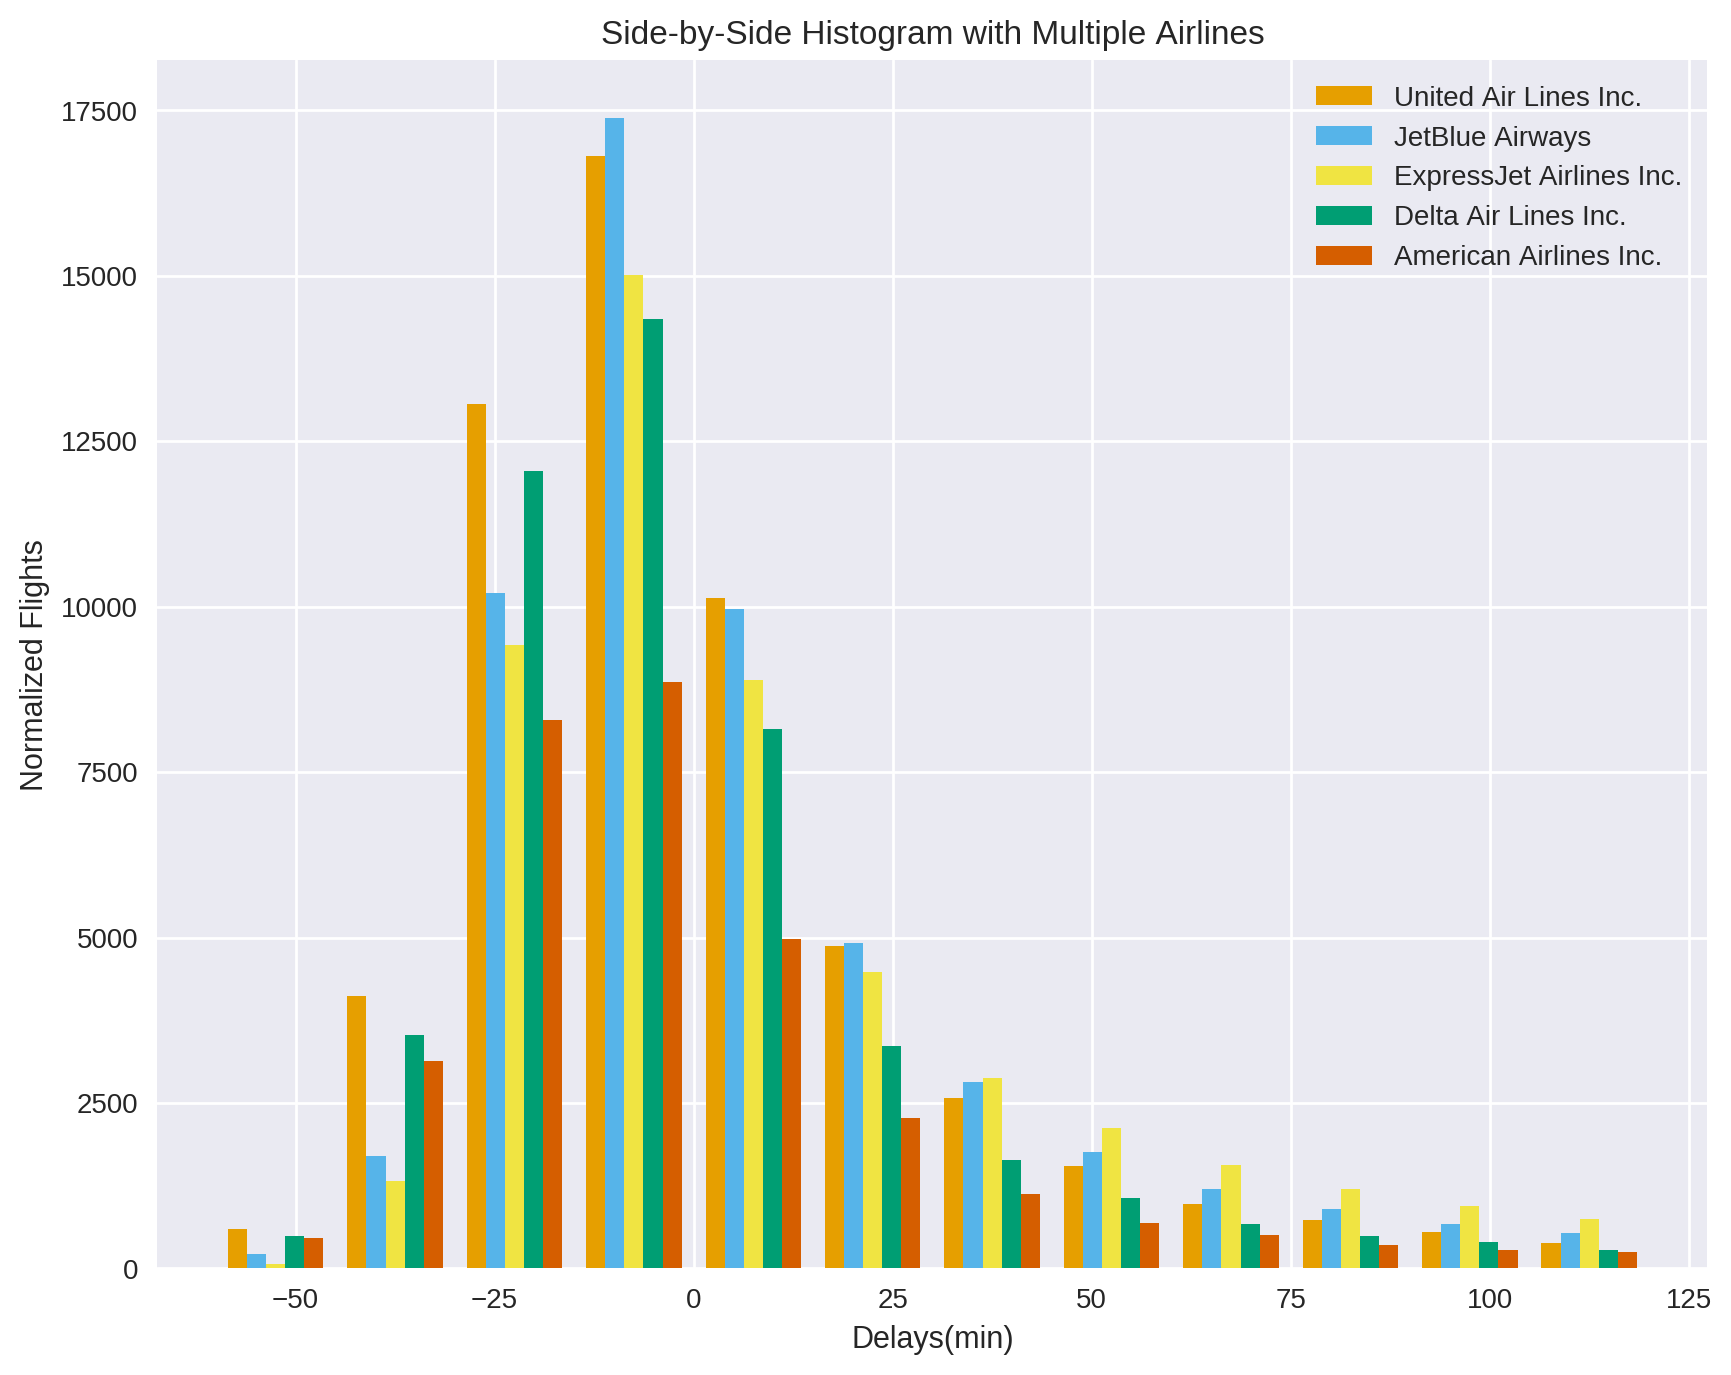

In [12]:
#side-by-side hIstogram
figsize(10,8)
import matplotlib.pyplot as plt
# Make the Histogram List of list
# Normalise the flights and assign colors and names
plt.hist([x1,x2,x3,x4,x5], bins = int(180/15),
         color = colors,label=names)

#Plot formatting
plt.legend()
plt.title('Side-by-Side Histogram with Multiple Airlines')
plt.xlabel("Delays(min)")
plt.ylabel('Normalized Flights')


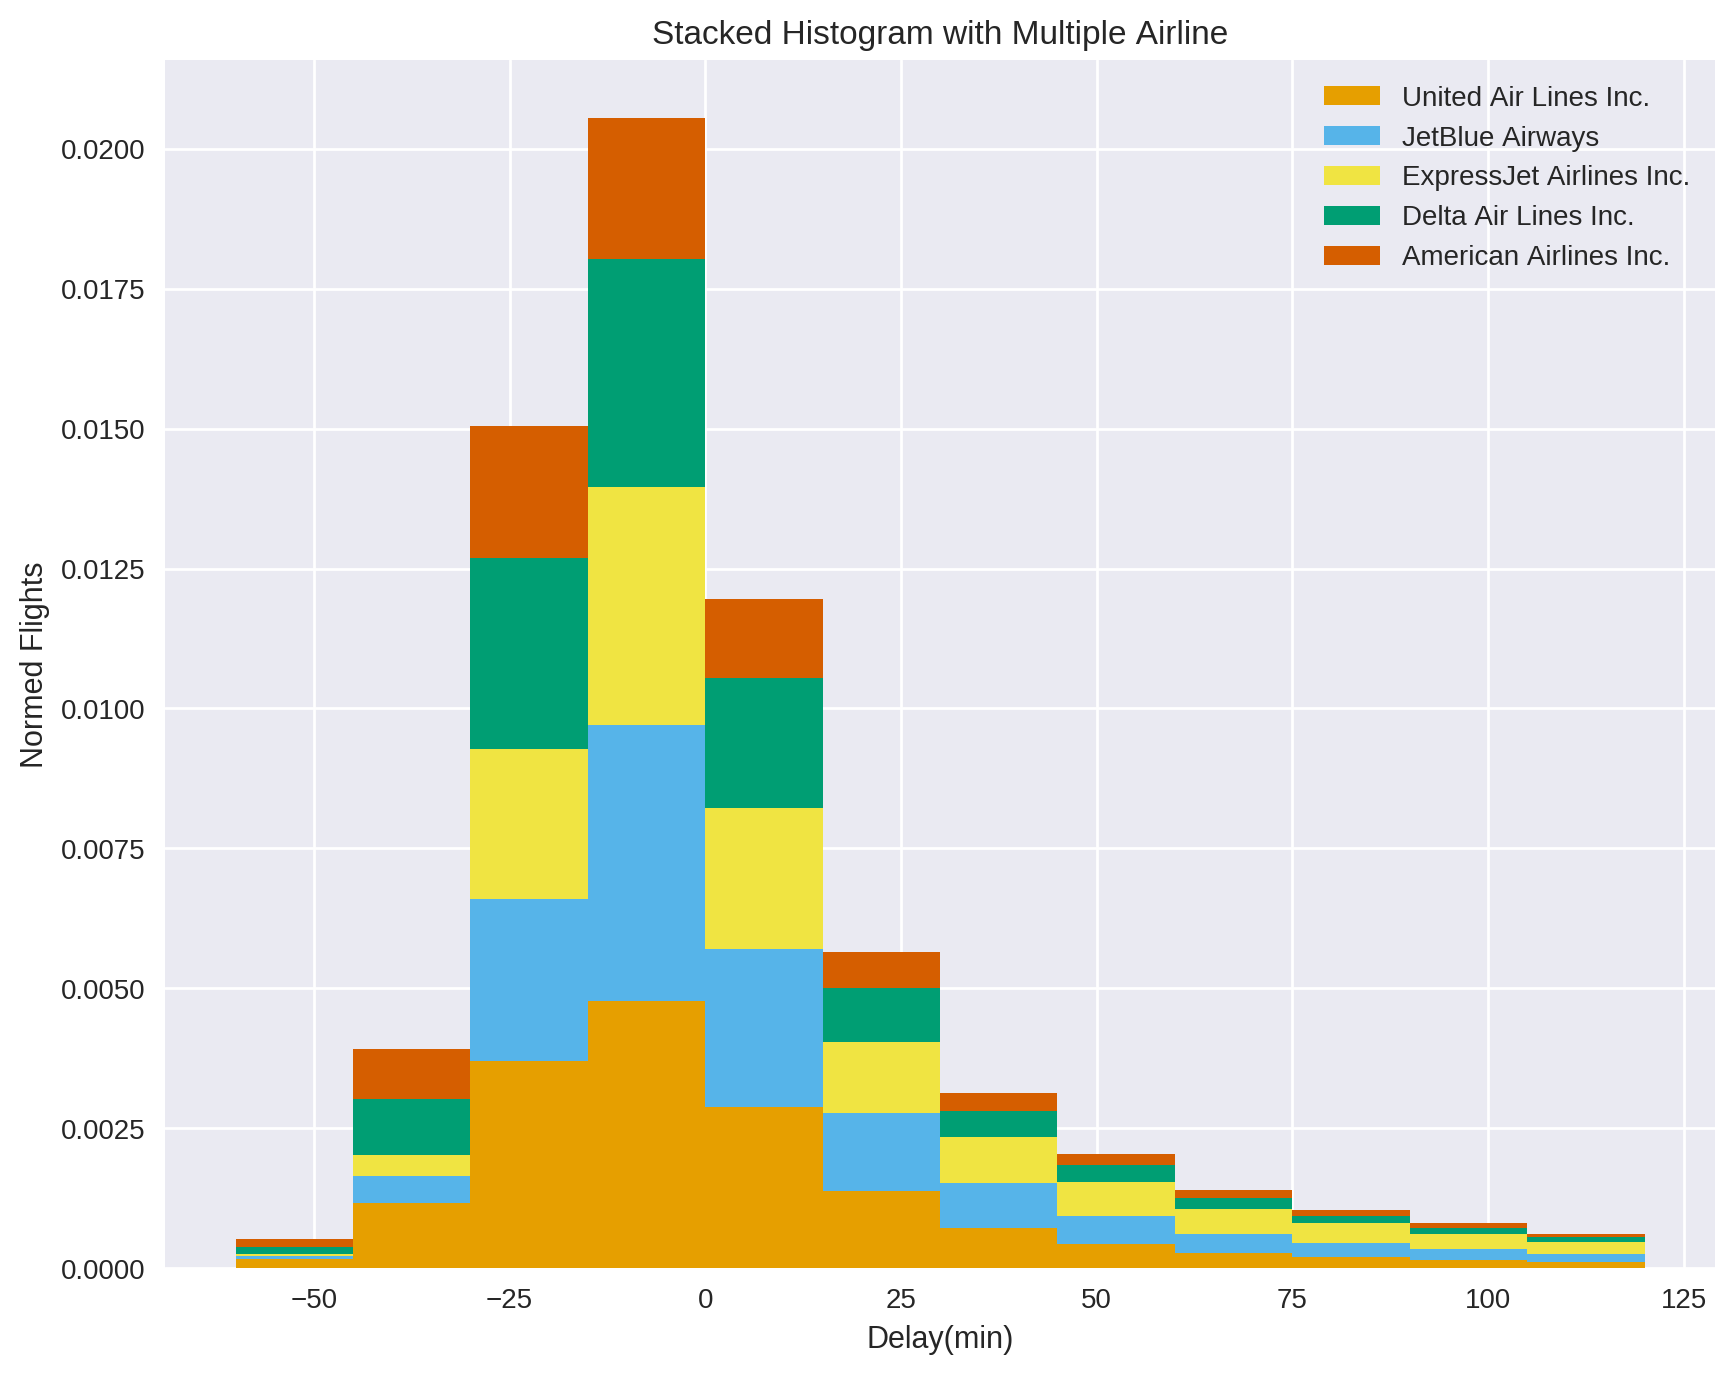

In [13]:
figsize(10,8)
plt.hist([x1,x2,x3,x4,x5],bins=int(180/15),normed=True,
        stacked=True,
        color=colors,label=names)
plt.legend();
plt.title('Stacked Histogram with Multiple Airline');
plt.xlabel('Delay(min)');plt.ylabel('Normed Flights');

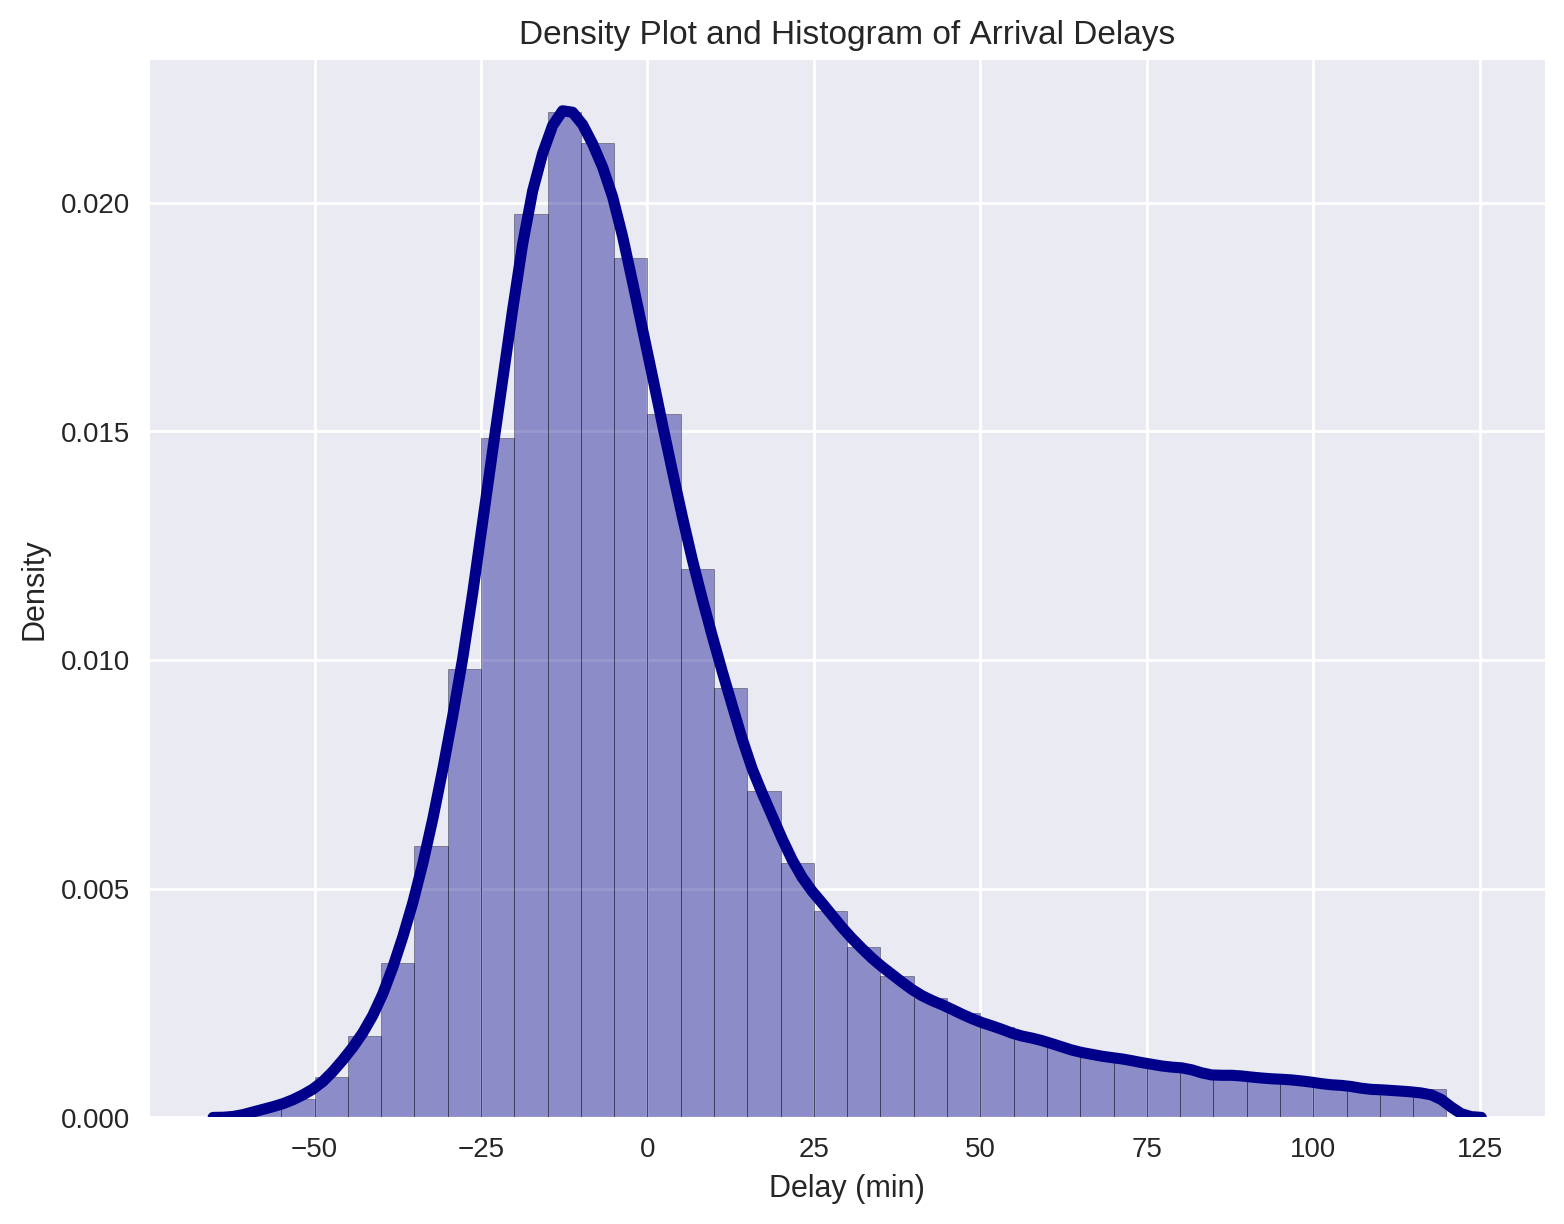

In [14]:
figsize(9, 7)

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

plt.title('Density Plot and Histogram of Arrival Delays') 
plt.xlabel('Delay (min)')
plt.ylabel('Density')



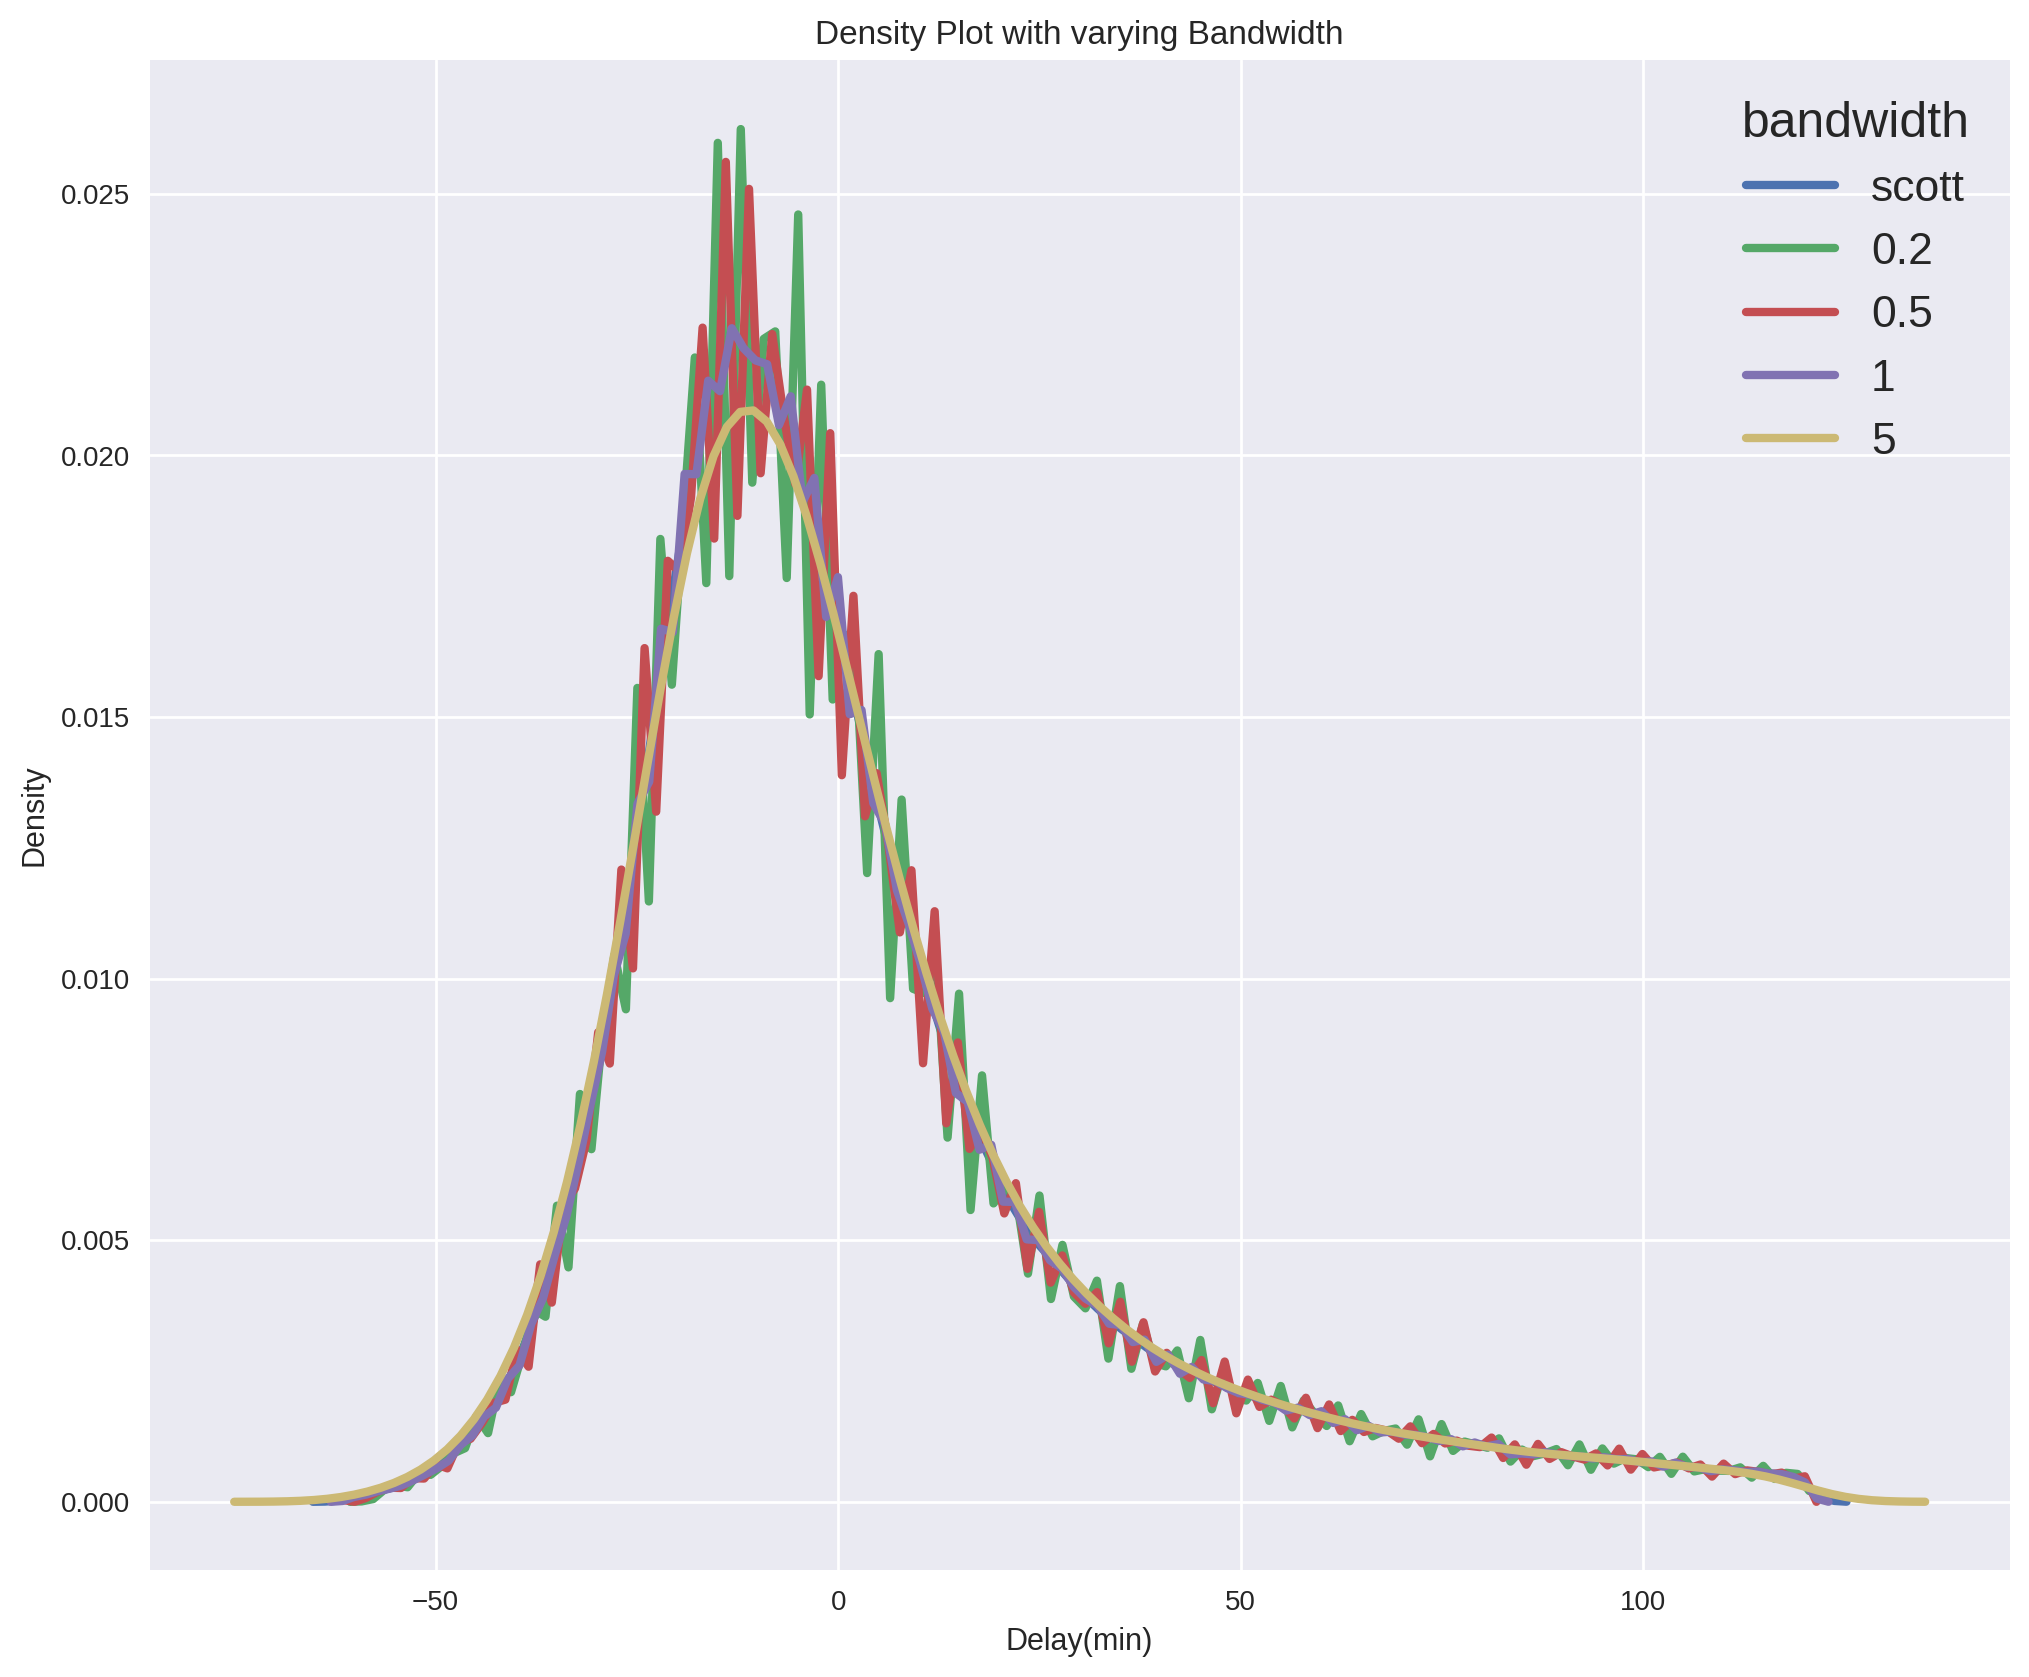

In [15]:
#Display Plot with varying bsndwidth
figsize(12,10)
for bandwidth in ['scott',0.2,0.5,1,5]:
    sns.distplot(flights['arr_delay'], hist=False, kde=True,
                kde_kws={'bw':bandwidth,'linewidth':3},
                label=bandwidth)
plt.legend(prop={'size':16},title='bandwidth')
plt.title("Density Plot with varying Bandwidth")
plt.ylabel("Density")
plt.xlabel("Delay(min)")

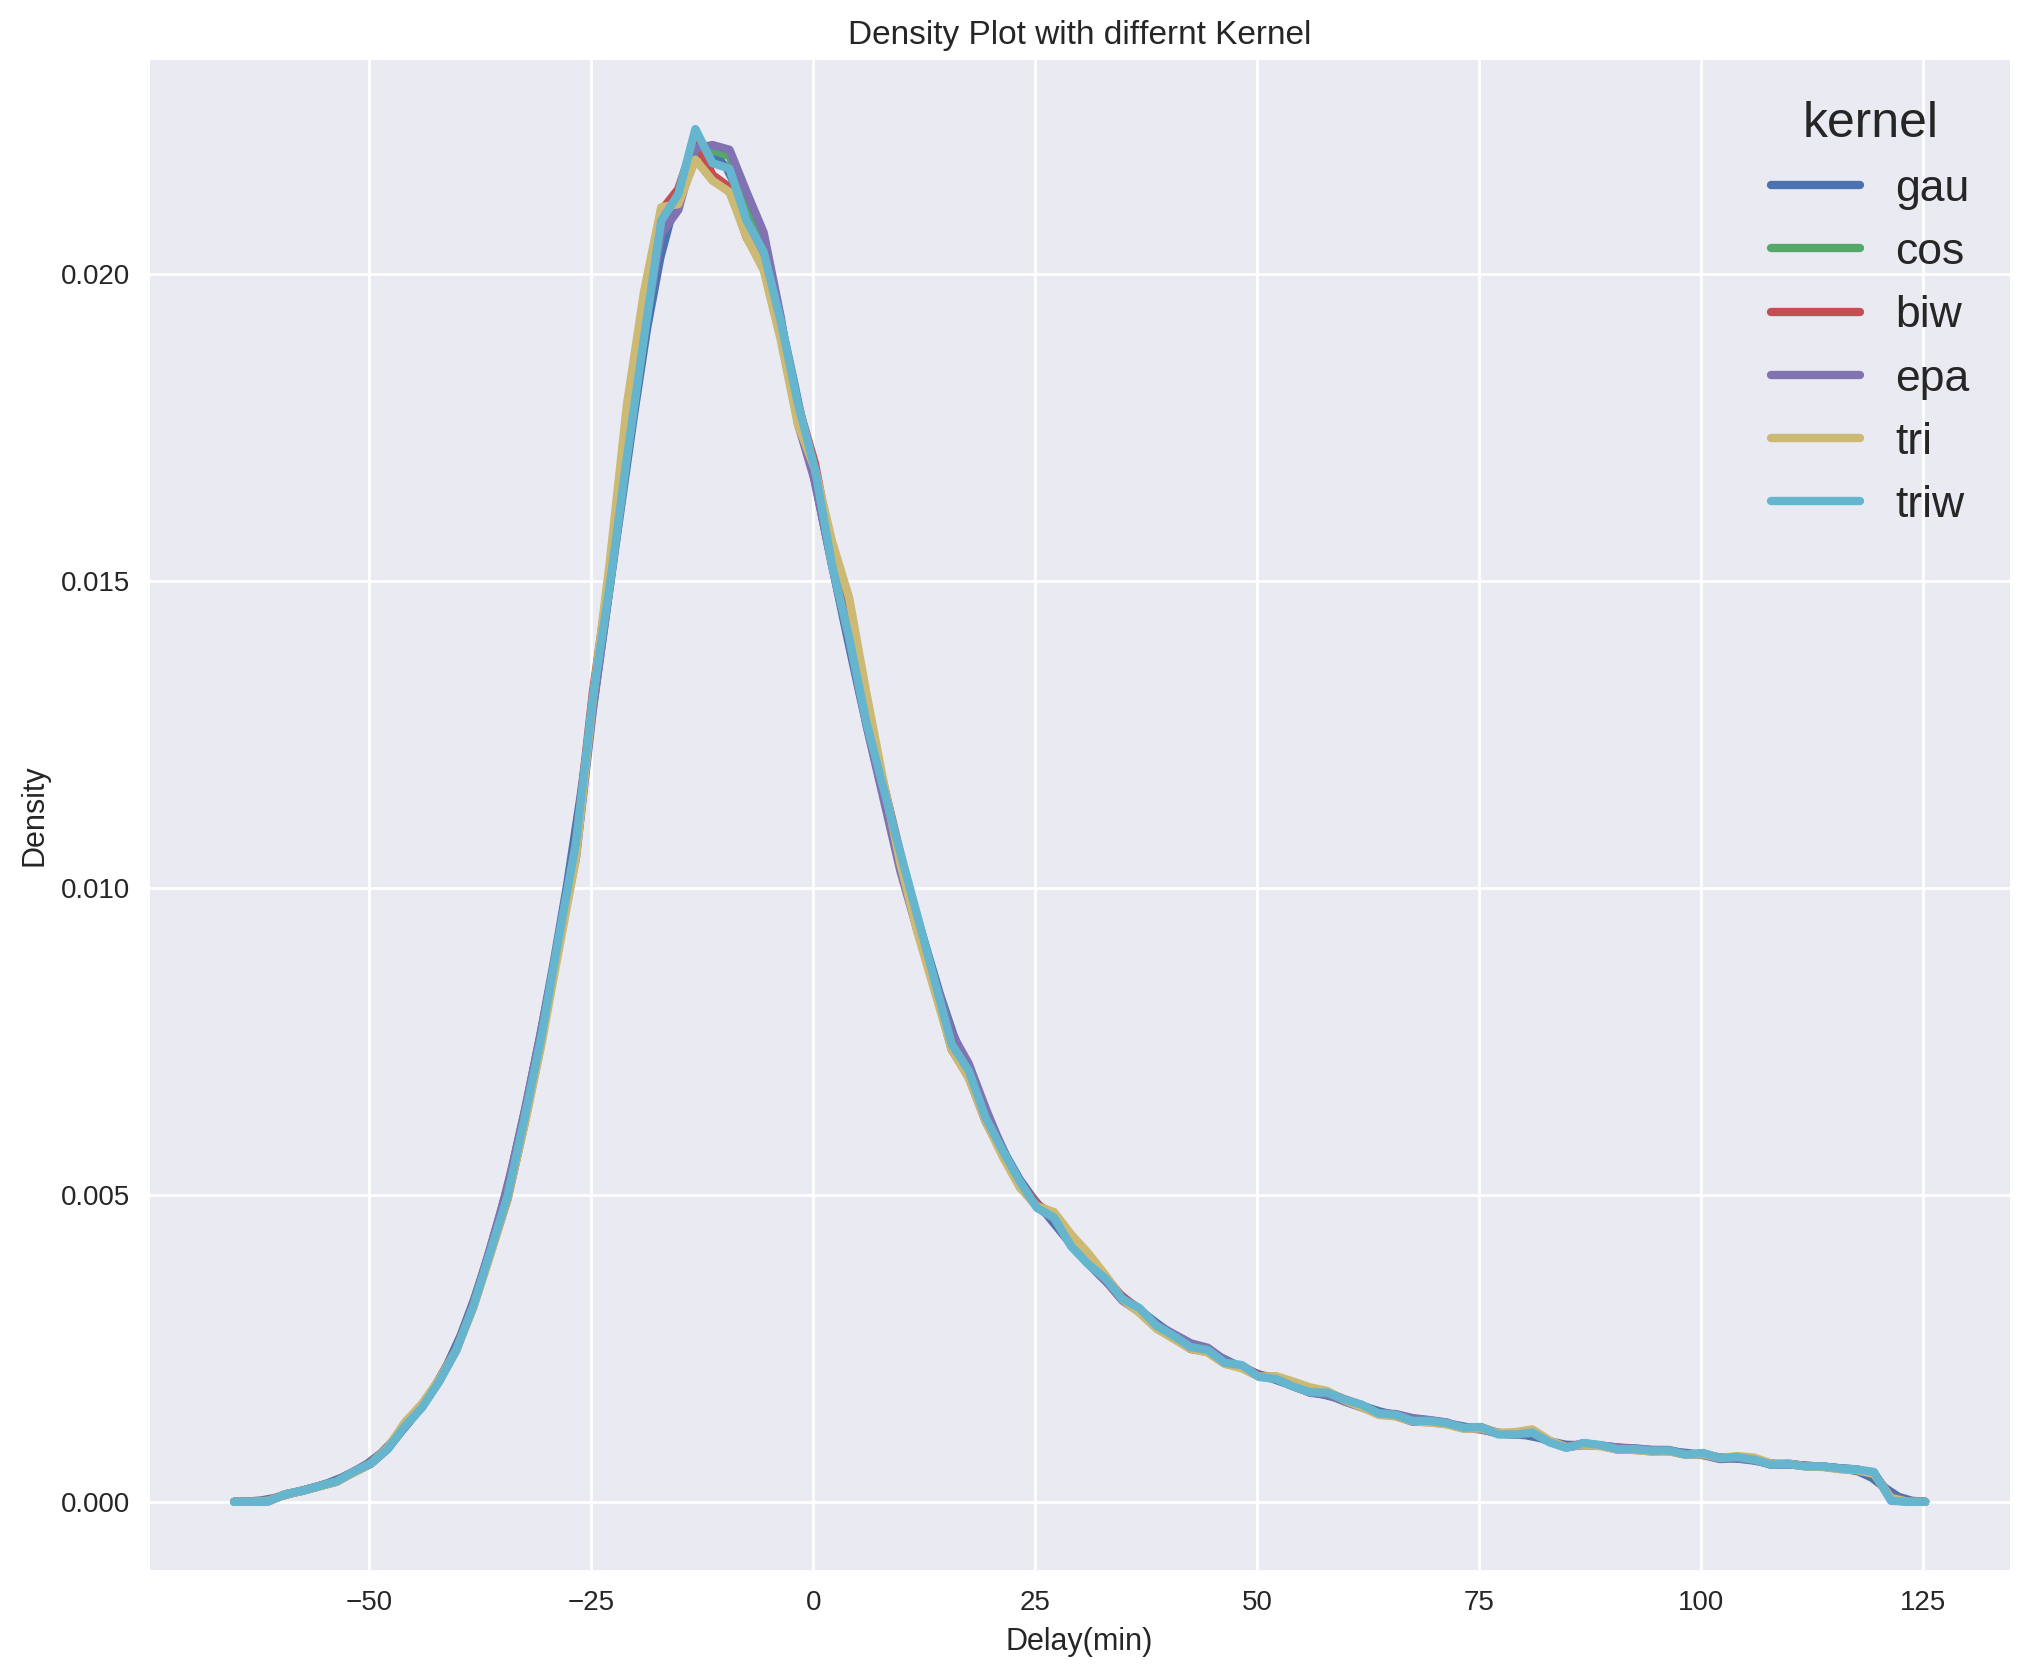

In [16]:
#Differnt Kernel for the Density Plot
for kernel in['gau','cos','biw','epa','tri','triw']:
    sns.distplot(flights['arr_delay'], hist=False, kde=True,
                 kde_kws={'kernel':kernel,'linewidth':3},
                label=kernel)
plt.legend(prop={'size':16},title='kernel')
plt.title("Density Plot with differnt Kernel")
plt.ylabel('Density')
plt.xlabel('Delay(min)')

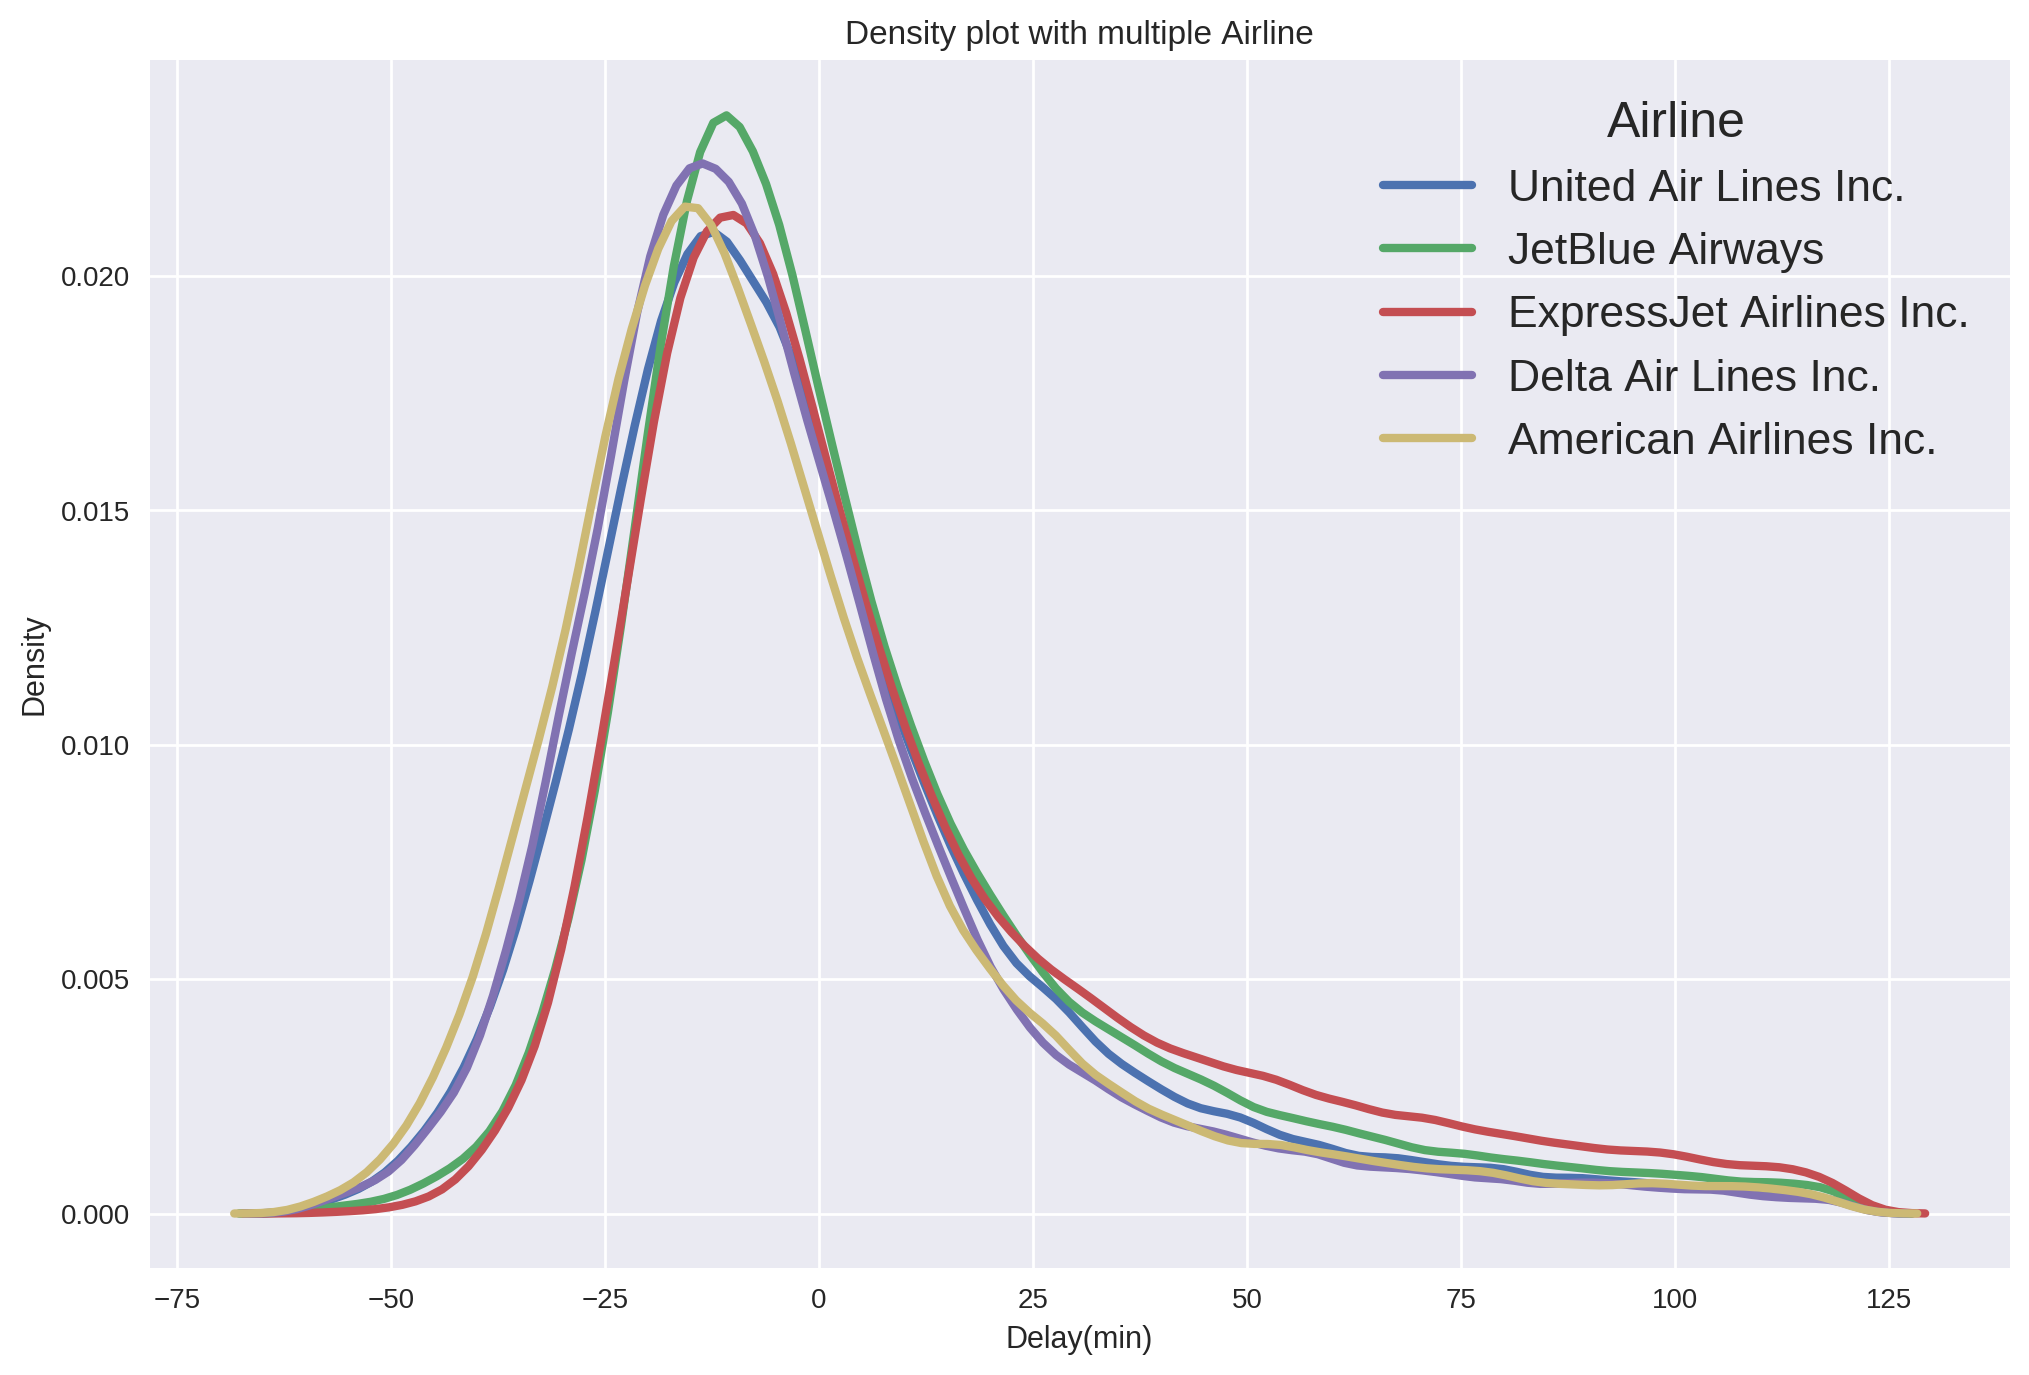

In [17]:
#Density Plot for delay of top Five
figsize(12,8)
#List of Five airline to plot
airlines=['United Air Lines Inc.','JetBlue Airways','ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.','American Airlines Inc.']
#Iterate through top five airline
for airline in airlines:
    #Subset to airline 
    subset=flights[flights['name']==airline]
    #Draw the density plot
    sns.distplot(subset['arr_delay'], hist=False, kde=True,
                kde_kws={'linewidth':3},
                label=airline)
plt.legend(prop={'size':16},title='Airline')
plt.title('Density plot with multiple Airline')
plt.ylabel('Density')
plt.xlabel('Delay(min)')

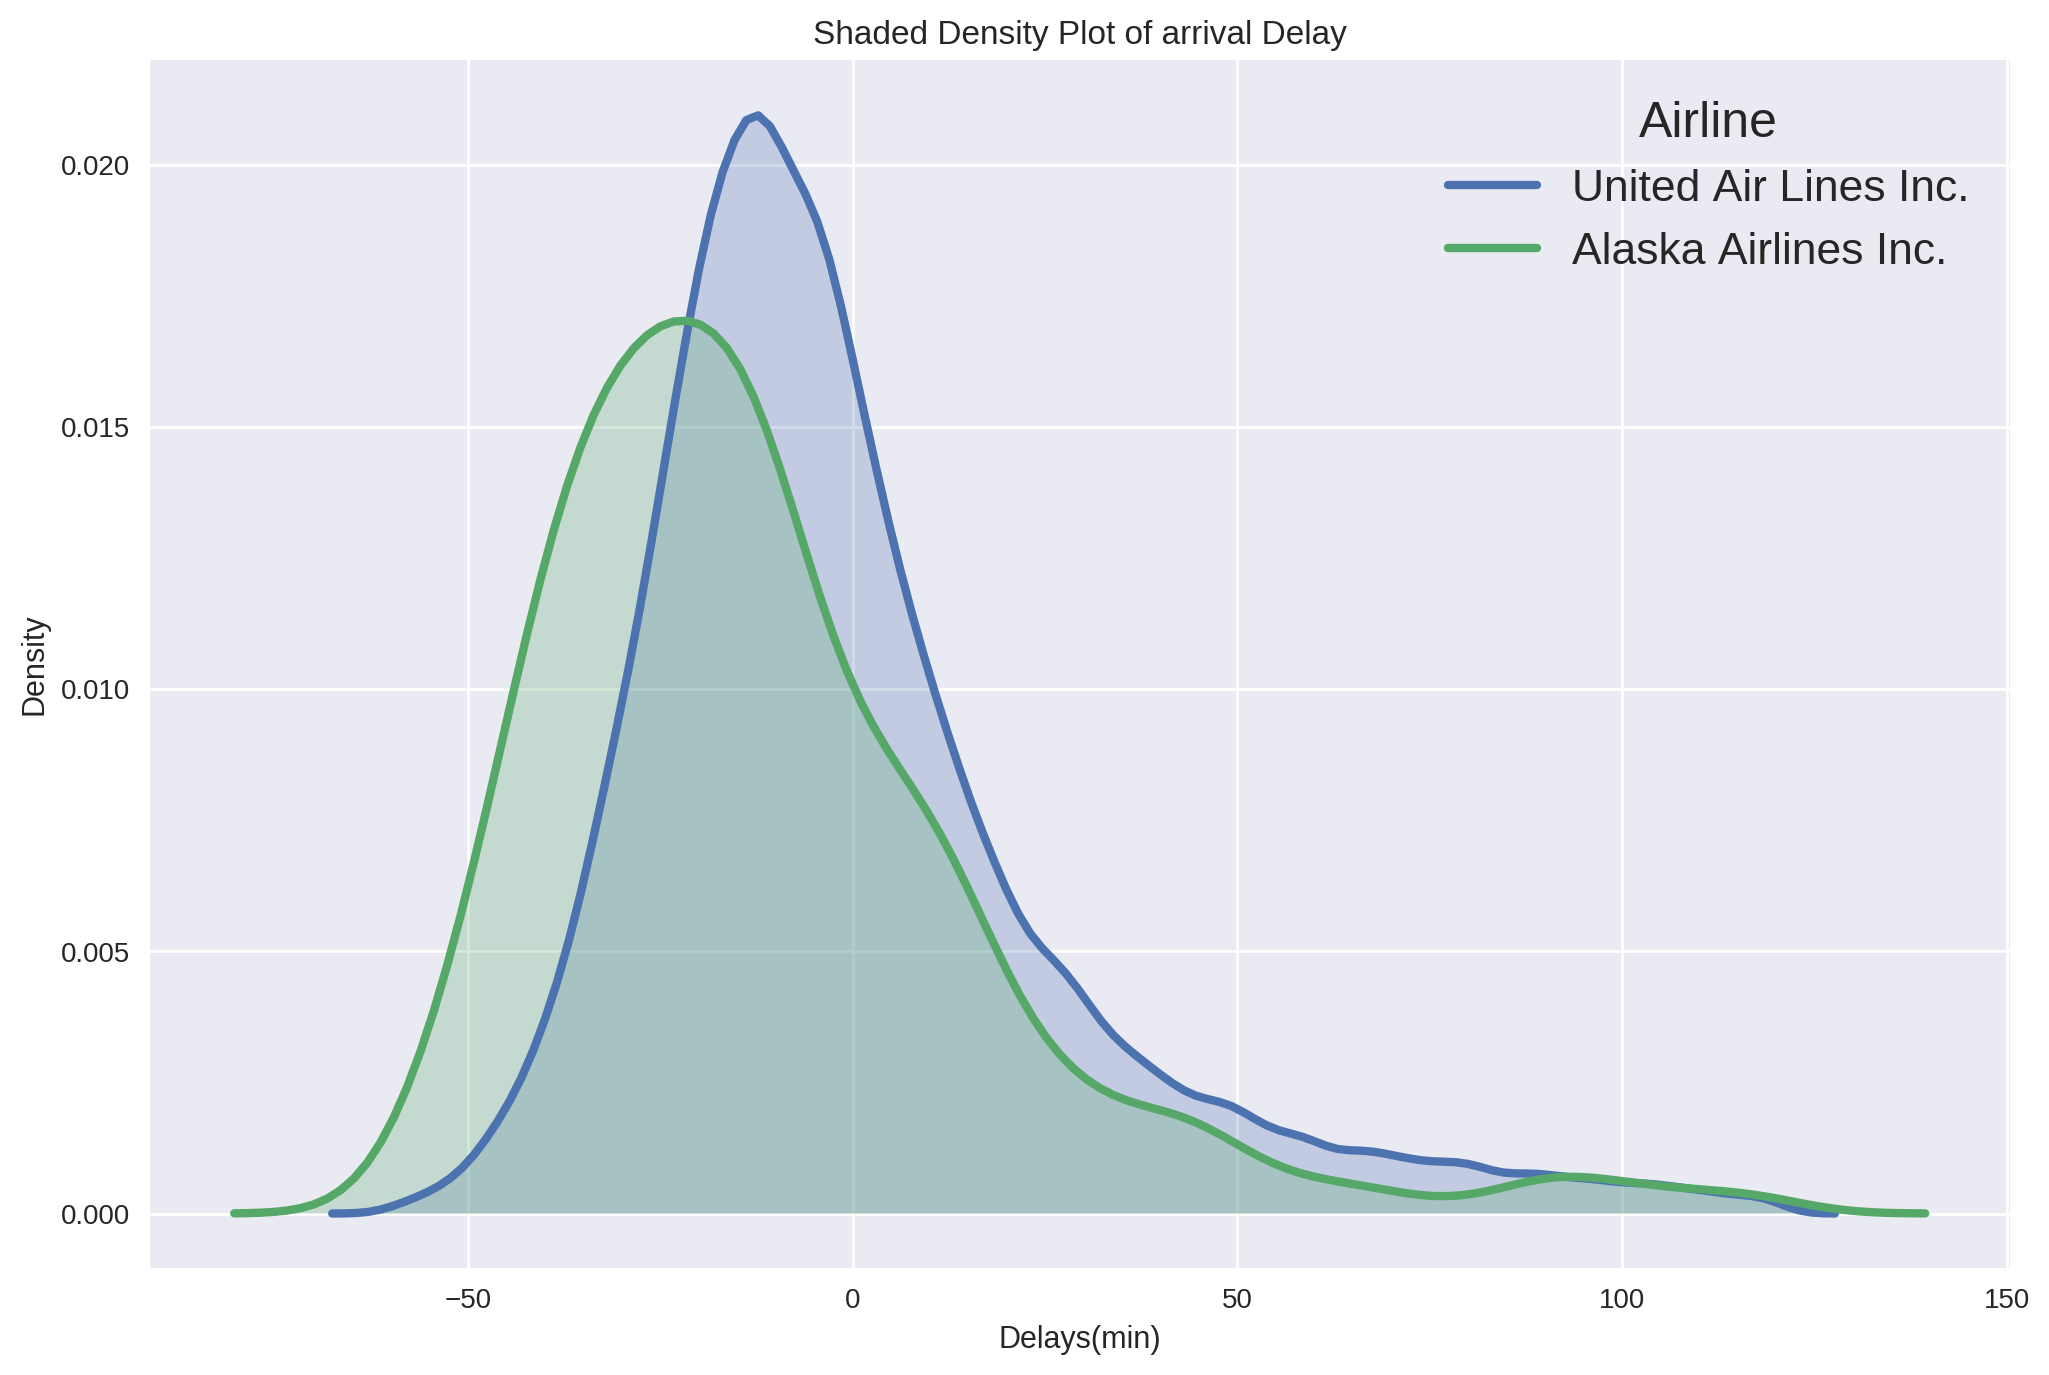

In [18]:
#Shaded Density Plot
for airline in ['United Air Lines Inc.','Alaska Airlines Inc.']:
    subset=flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist=False, kde=True,
                kde_kws={'shade':True,'linewidth':3},
                label=airline)
plt.legend(prop={'size': 16}, title='Airline')
plt.title('Shaded Density Plot of arrival Delay')
plt.ylabel("Density")
plt.xlabel("Delays(min)")

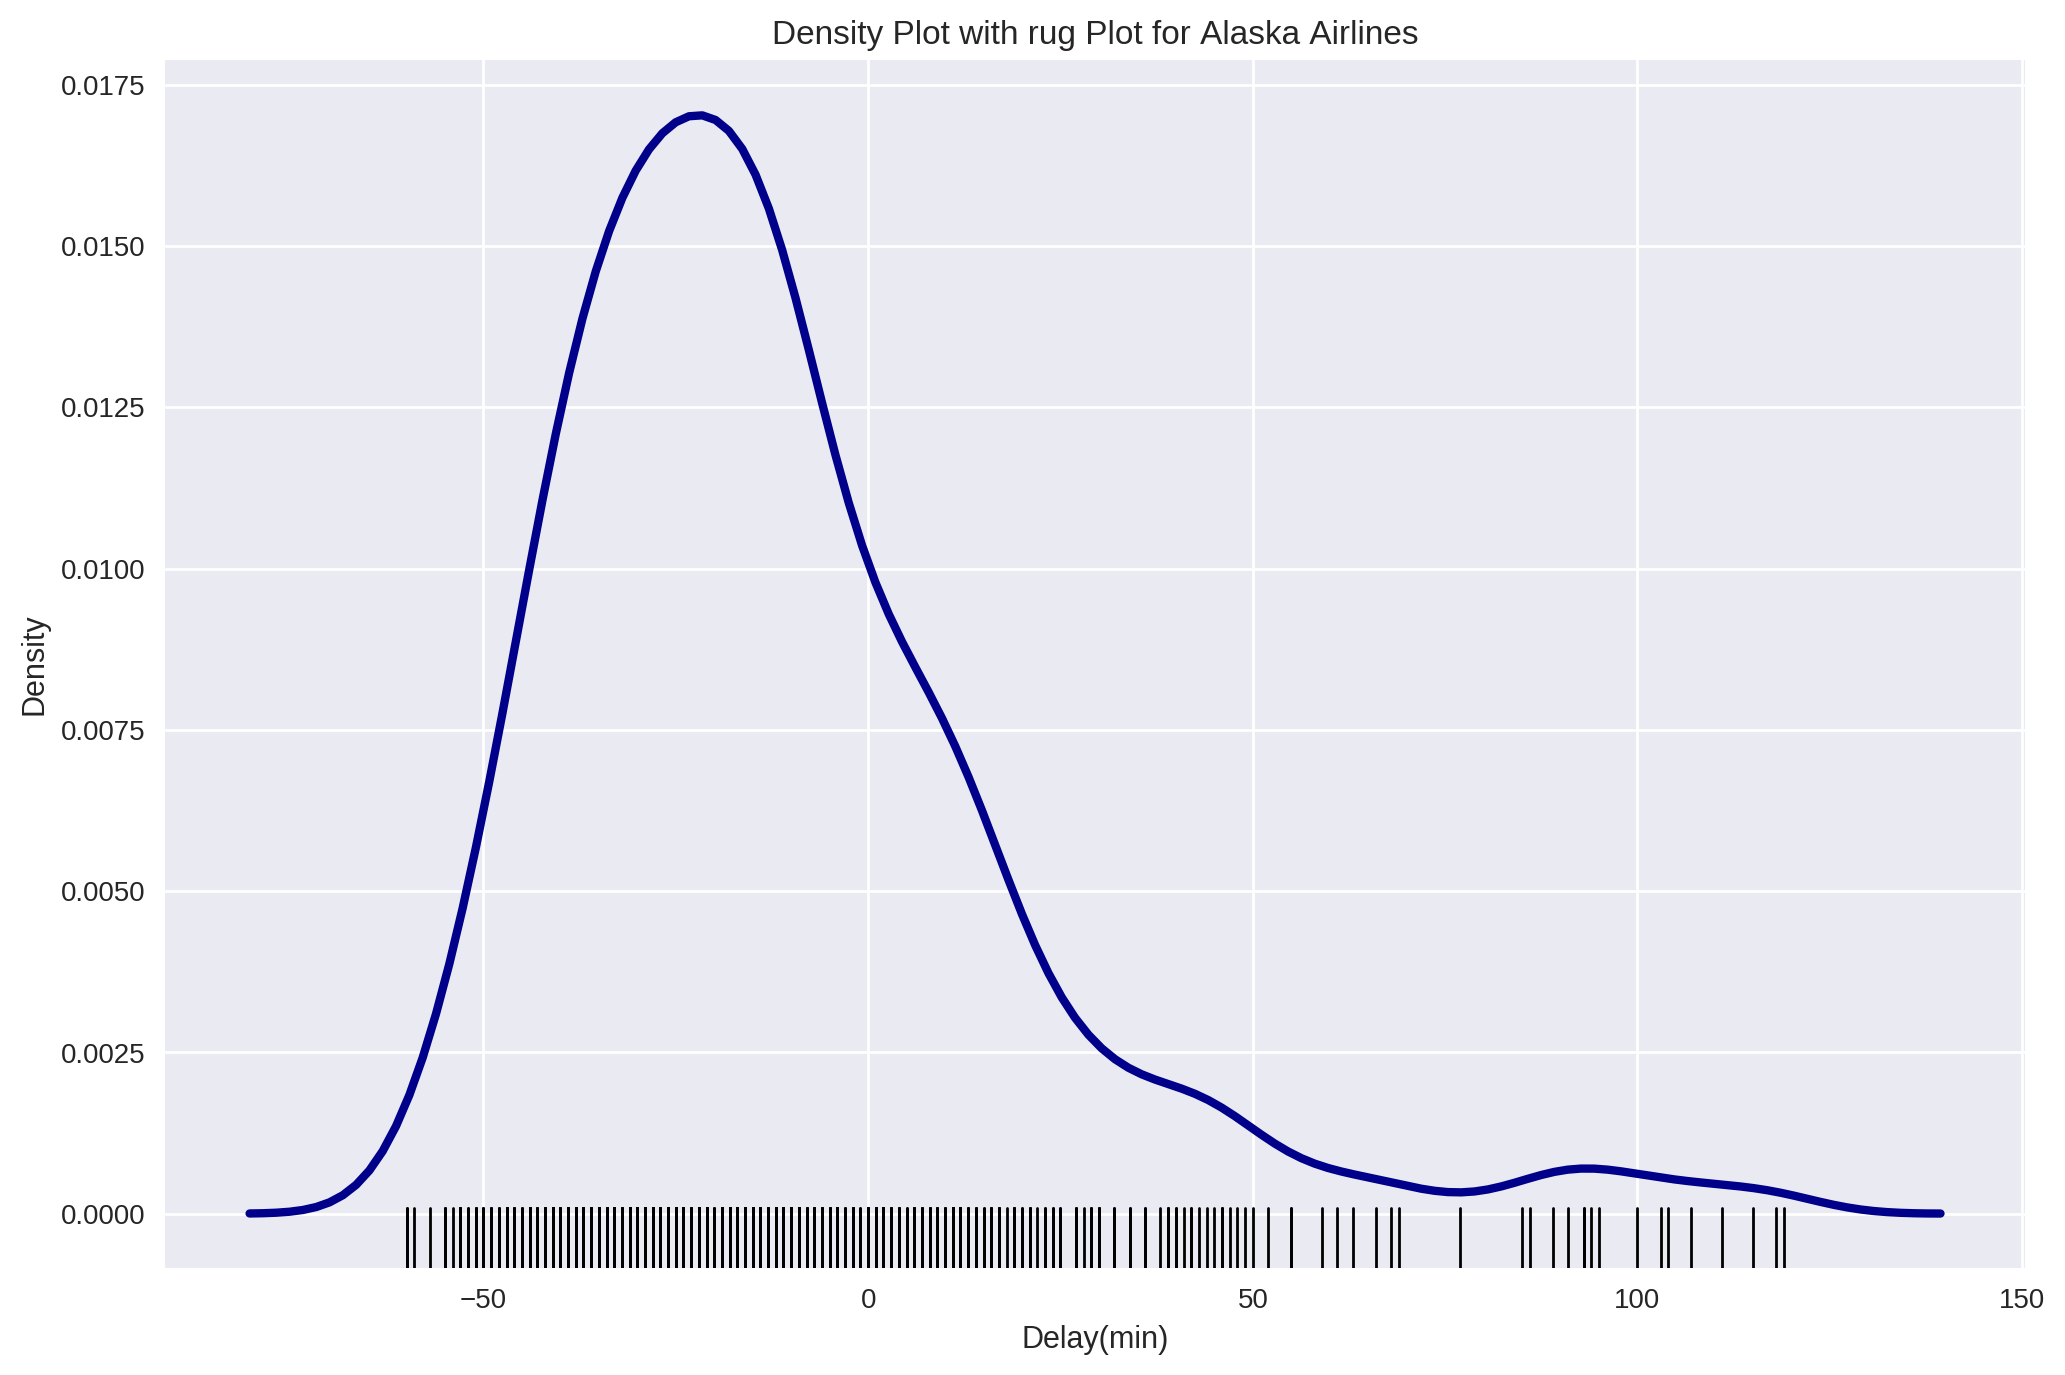

In [19]:
#Density with rug Plot
#Subset to Alaska Airlines 
subset=flights[flights['name'] == 'Alaska Airlines Inc.']
#Density Plot with rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
            color='darkblue',
            kde_kws={'linewidth':3},
            rug_kws={'color':'black'})
#Plot formatting
plt.title("Density Plot with rug Plot for Alaska Airlines")
plt.ylabel('Density')
plt.xlabel('Delay(min)')
